In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/Covid_19_Clean_Complete (1).csv")
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [4]:
df.shape

(49068, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
df.rename(columns={'Province/State':'State', 'Country/Region':'Country'},inplace=True)

In [7]:
df.head(10)

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [8]:
df['Date'].value_counts()

,count
Date,
2020-01-22,261
2020-05-30,261
2020-05-21,261
2020-05-22,261
2020-05-23,261
...,...
2020-03-26,261
2020-03-27,261
2020-03-28,261


In [9]:
#checking the maximum date
df['Date'].max()

'2020-07-27'

In [10]:
# populating the rows of maximum date on top
top=df[df['Date']=='2020-07-27']
top

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [11]:
# Grouping all rows absed on country

a=top.groupby('Country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
a

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [12]:
confirmed=df.groupby(by='Date')['Confirmed'].sum().reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


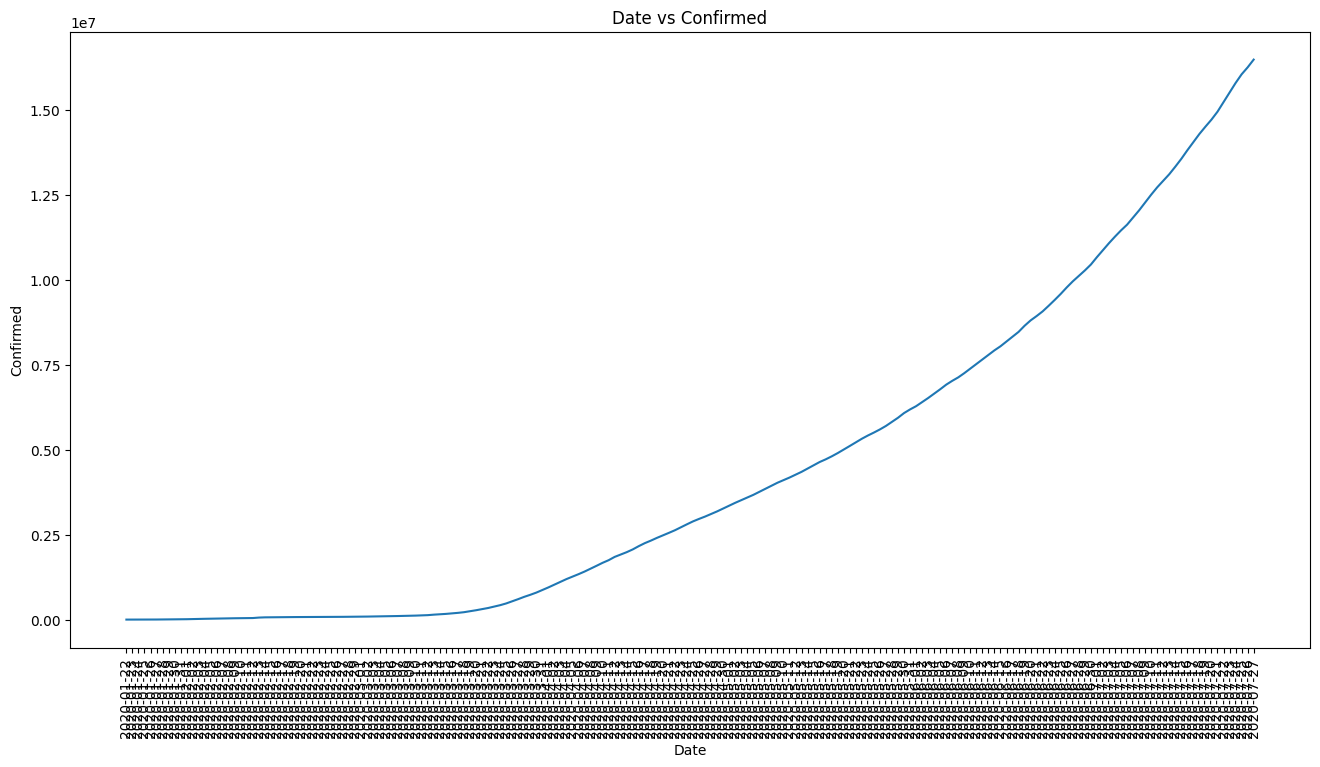

In [13]:
# visualizing the confirm case

plt.figure(figsize=(16,8))
sns.lineplot(data=confirmed, x='Date', y='Confirmed')
plt.title("Date vs Confirmed")
plt.xticks(rotation=90)
plt.show()


**Top 10 Countries with most Recovered cases**

In [14]:
recovered=df.groupby(by='Country')['Recovered'].sum().sort_values(ascending=False).reset_index()
recovered.head(10)

,Country,Recovered
0,US,56353416
1,Brazil,54492873
2,Russia,25120448
3,India,23783720
4,Germany,17107839
5,Italy,15673910
6,Iran,15200895
7,Spain,15093583
8,Turkey,13345389
9,Chile,13292593


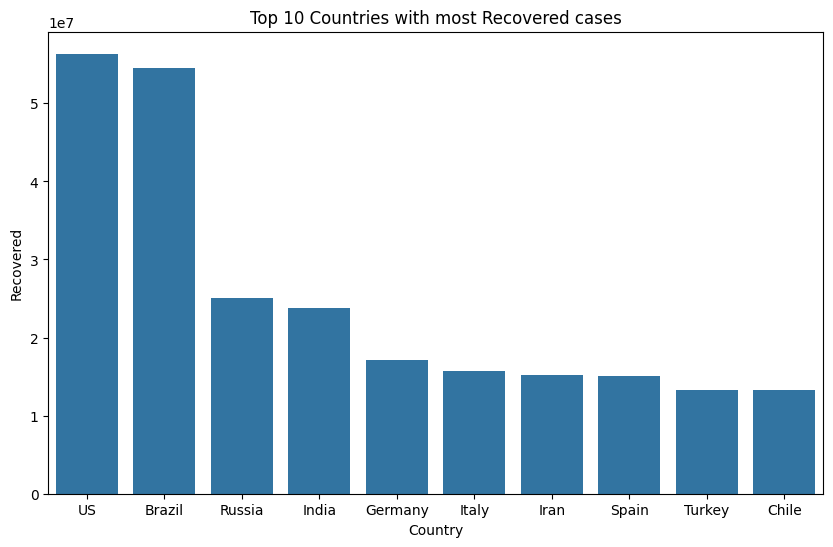

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(data=recovered.head(10), x='Country', y='Recovered')
plt.title('Top 10 Countries with most Recovered cases')
plt.show()

**Top 10 countries with death**

In [16]:
deaths=df.groupby(by='Country')['Deaths'].sum().sort_values(ascending=False).reset_index()
deaths.head(10)

,Country,Deaths
0,US,11011411
1,United Kingdom,3997775
2,Brazil,3938034
3,Italy,3707717
4,France,3048524
5,Spain,3033030
6,Mexico,1728277
7,India,1111831
8,Iran,1024136
9,Belgium,963679


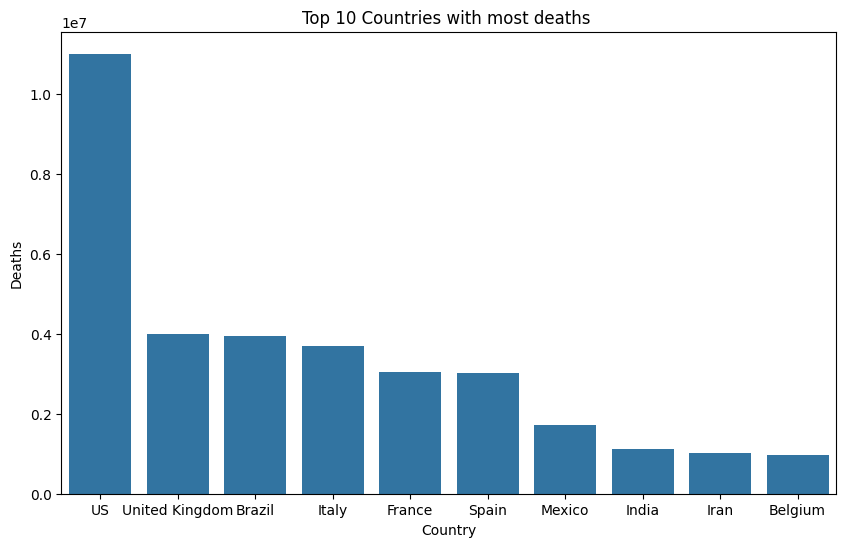

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(data=deaths.head(10), x='Country', y='Deaths')
plt.title('Top 10 Countries with most deaths ')
plt.show()

**TOP 10 Countries with most active cases**



In [18]:
active=df.groupby(by='Country')['Active'].sum().sort_values(ascending=False).reset_index()
active.head(10)

,Country,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


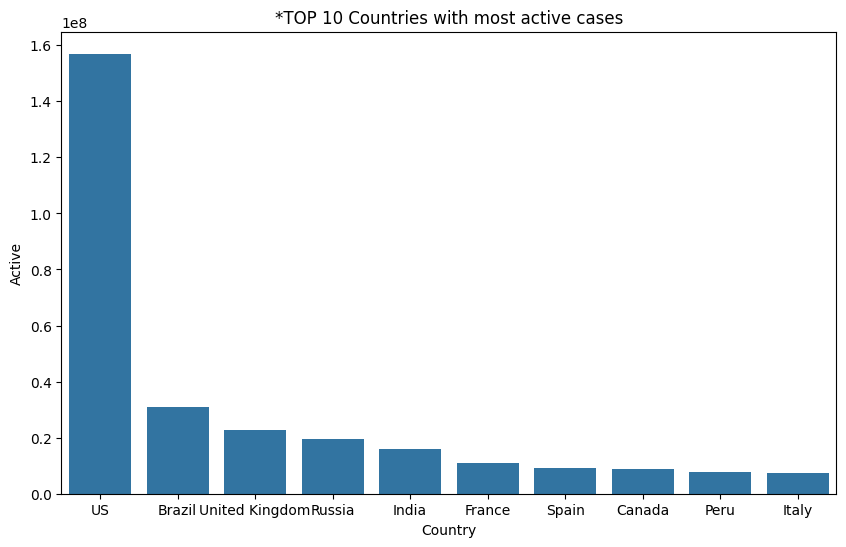

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=active.head(10), x='Country', y='Active')
plt.title('*TOP 10 Countries with most active cases')
plt.show()

**Country Based Analysis**

In [20]:
# US
US=df[df['Country']=='US']


In [21]:
US=US.groupby(by='Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
US.head()


,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5


In [22]:
# China

ch=df[df['Country']=='China']
ch=ch.groupby(by='Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
ch.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,548,17,28,503
1,2020-01-23,643,18,30,595
2,2020-01-24,920,26,36,858
3,2020-01-25,1406,42,39,1325
4,2020-01-26,2075,56,49,1970


In [23]:
#India

india=df[df['Country']=='India']
india=india.groupby(by='Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
india.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


**Comparing India, US , China on the basis of Recovered cases**

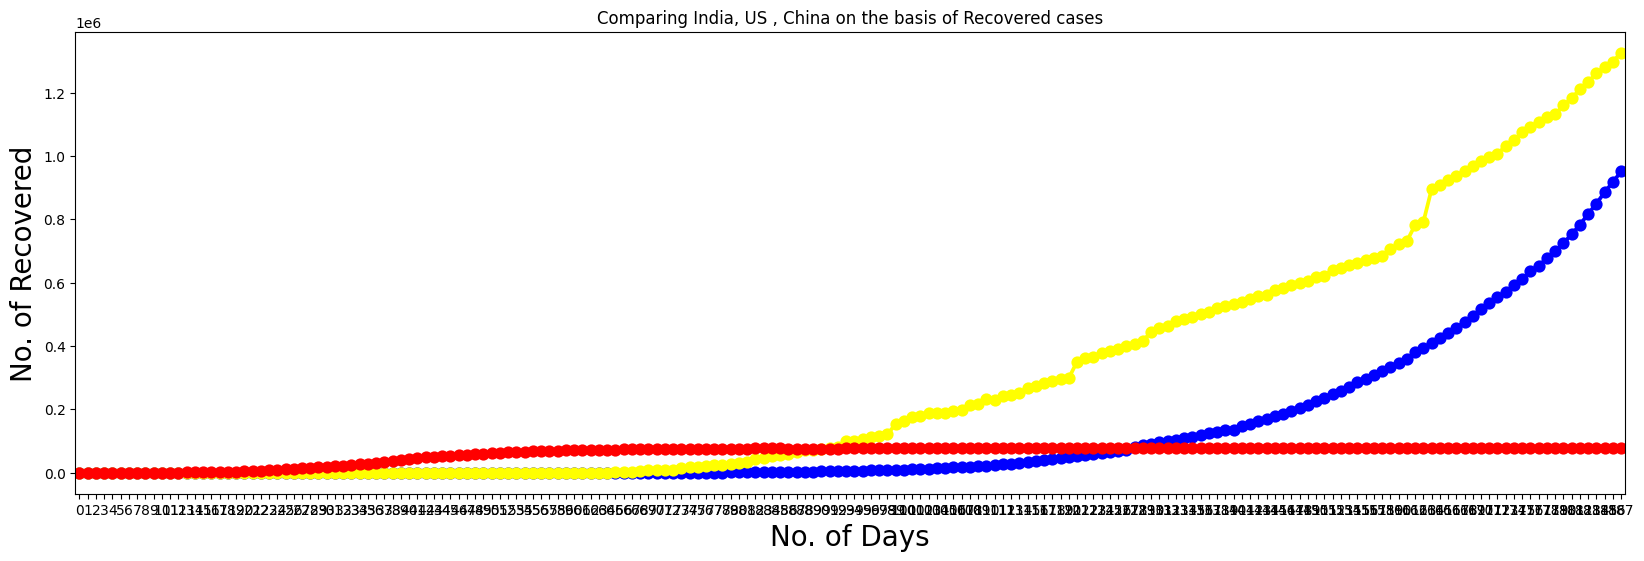

In [24]:
plt.figure(figsize=(20,6))
sns.pointplot(x=india.index ,y=india.Recovered,color='Blue')
sns.pointplot(x=US.index, y=US.Recovered,color='Yellow')
sns.pointplot(x=ch.index, y=ch.Recovered,color='Red')
plt.title("Comparing India, US , China on the basis of Recovered cases")

plt.xlabel('No. of Days', fontsize = 20)
plt.ylabel('No. of Recovered', fontsize = 20)
plt.show()

**Comparing India, US , China on the basis of Deaths**

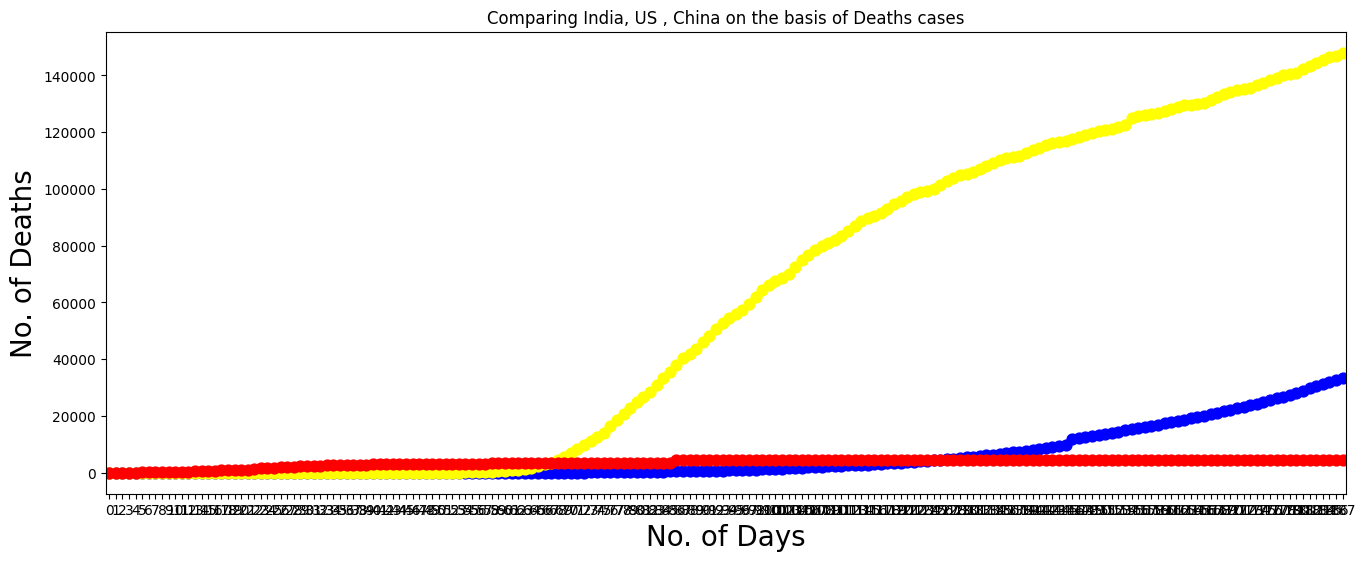

In [25]:
plt.figure(figsize=(16,6))
sns.pointplot(x=india.index ,y=india.Deaths,color='Blue')
sns.pointplot(x=US.index, y=US.Deaths,color='Yellow')
sns.pointplot(x=ch.index, y=ch.Deaths,color='Red')
plt.title("Comparing India, US , China on the basis of Deaths cases")

plt.xlabel('No. of Days', fontsize = 20)
plt.ylabel('No. of Deaths', fontsize = 20)
plt.show()

**Comparing India, US , China on the basis of Active cases**

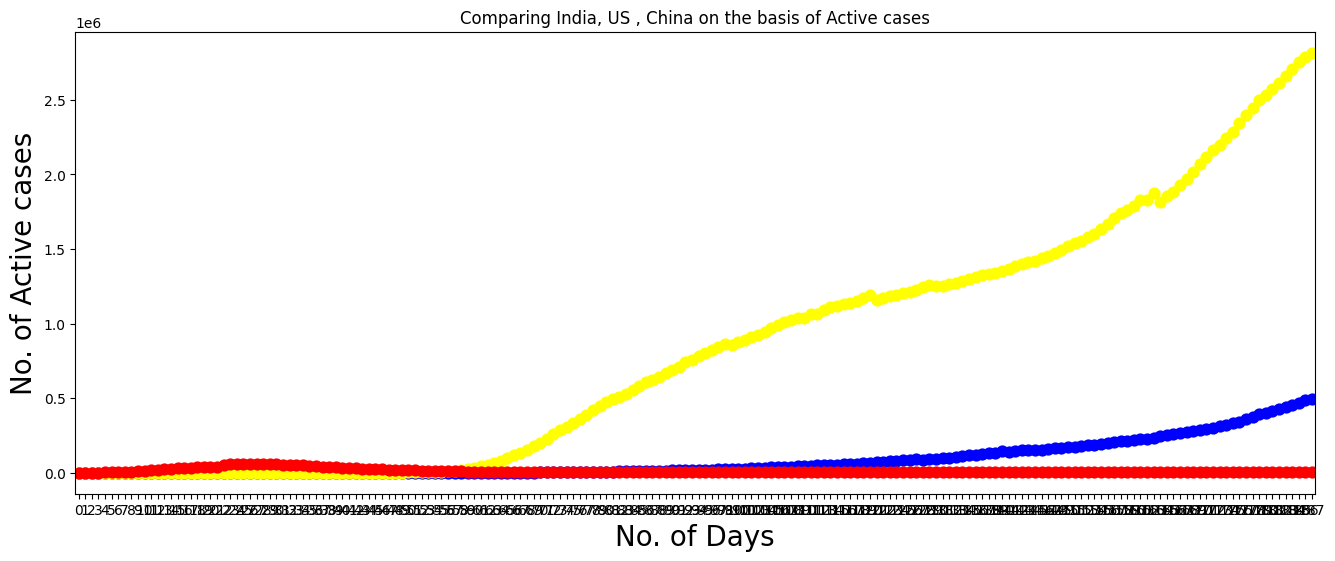

In [26]:
plt.figure(figsize=(16,6))
sns.pointplot(x=india.index ,y=india.Active,color='Blue')
sns.pointplot(x=US.index, y=US.Active,color='Yellow')
sns.pointplot(x=ch.index, y=ch.Active,color='Red')
plt.title("Comparing India, US , China on the basis of Active cases")

plt.xlabel('No. of Days', fontsize = 20)
plt.ylabel('No. of Active cases', fontsize = 20)
plt.show()

**Model Building**

In [27]:
!pip install prophet

In [29]:
df1=pd.read_csv("/content/drive/MyDrive/Datasets/Covid_19_Clean_Complete (1).csv", parse_dates=['Date'])
df1.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [31]:
# creating a new dataset for confirm cases

conf=df1.groupby(by='Date')['Confirmed'].sum().reset_index()
conf

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [32]:
# creating a new dataset for death cases

death=df1.groupby(by='Date')['Deaths'].sum().reset_index()
death

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [33]:
# creating a new dataset for Recovered cases

recover=df1.groupby(by='Date')['Recovered'].sum().reset_index()
recover

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [34]:
# creating a new dataset for Active cases

active=df1.groupby(by='Date')['Active'].sum().reset_index()
active

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


**Forecasting for confirm cases**

In [41]:
conf.columns=['ds','y']
conf.head()


,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [37]:
# importing prophet library

from prophet import Prophet

In [38]:
ph=Prophet()

In [42]:
ph.fit(conf)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgqdfsopa/jkau3xnw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgqdfsopa/vgh60ur9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4602', 'data', 'file=/tmp/tmpgqdfsopa/jkau3xnw.json', 'init=/tmp/tmpgqdfsopa/vgh60ur9.json', 'output', 'file=/tmp/tmpgqdfsopa/prophet_modelznqu3gl1/prophet_model-20250206061447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:14:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:14:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [44]:
future=ph.make_future_dataframe(periods=7)

forecast=ph.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.237144e+05,8.658010e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.139976e+05,9.568833e+04,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-1.053974e+05,1.096704e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-1.022730e+05,1.201341e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-9.816116e+04,1.086682e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.663571e+07,1.685745e+07,1.673728e+07,1.675027e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.684793e+07,1.706873e+07,1.693300e+07,1.695979e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.705775e+07,1.727711e+07,1.712783e+07,1.717214e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.725621e+07,1.747487e+07,1.732370e+07,1.738496e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [50]:
forecast[['ds','yhat','yhat_upper','yhat_lower']]
'''
ds:
This column contains the dates for which the predictions have been made. It stands for "date stamp."

yhat:
This is the predicted value (forecast) for the given date in the ds column. It represents the model's best estimate for that point in time.

yhat_upper:
This column represents the upper bound of the predicted value, which indicates the higher end of the confidence interval.
It suggests that the actual value is unlikely to exceed this amount, giving you an idea of the prediction's uncertainty.

yhat_lower:
This column represents the lower bound of the predicted value, indicating the lower end of the confidence interval. It suggests that the actual value is unlikely to be lower than this amount.
'''

'\nds:\nThis column contains the dates for which the predictions have been made. It stands for "date stamp."\n\nyhat:\nThis is the predicted value (forecast) for the given date in the ds column. It represents the model\'s best estimate for that point in time.\n\nyhat_upper:\nThis column represents the upper bound of the predicted value, which indicates the higher end of the confidence interval.\nIt suggests that the actual value is unlikely to exceed this amount, giving you an idea of the prediction\'s uncertainty.\n\nyhat_lower:\nThis column represents the lower bound of the predicted value, indicating the lower end of the confidence interval. It suggests that the actual value is unlikely to be lower than this amount.\n'

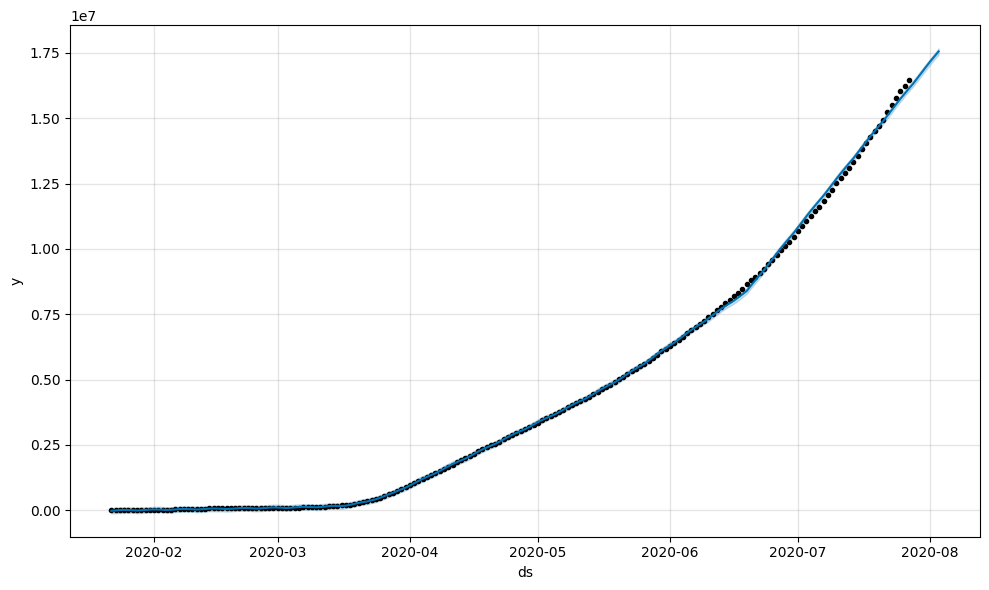

In [45]:
ph.plot(forecast)
plt.show()

In [46]:
import plotly

In [47]:
import plotly.express as px

In [48]:
world=df1.groupby(by='Country/Region')[['Confirmed','Active','Deaths','Recovered']].sum().reset_index()
world

,Country/Region,Confirmed,Active,Deaths,Recovered
0,Afghanistan,1936390,1089052,49098,798240
1,Albania,196702,72117,5708,118877
2,Algeria,1179755,345886,77972,755897
3,Andorra,94404,19907,5423,69074
4,Angola,22662,15011,1078,6573
...,...,...,...,...,...
182,West Bank and Gaza,233461,170967,1370,61124
183,Western Sahara,901,190,63,648
184,Yemen,67180,25694,17707,23779
185,Zambia,129421,43167,2643,83611


In [49]:
# visualizing using plotly library
figure = px.choropleth(world,locations='Country/Region',
                        locationmode = 'country names',
                        color='Active',
                        hover_name='Country/Region', range_color=[1,20000],
                        color_continuous_scale='reds',
                        title='Countries with Active Cases')
figure.show()

**Thank You**